In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

0.2194490555094449
0.15875841241587585
1111.111111111111 588.2352941176471
38505.69991529559 39523.89685986867


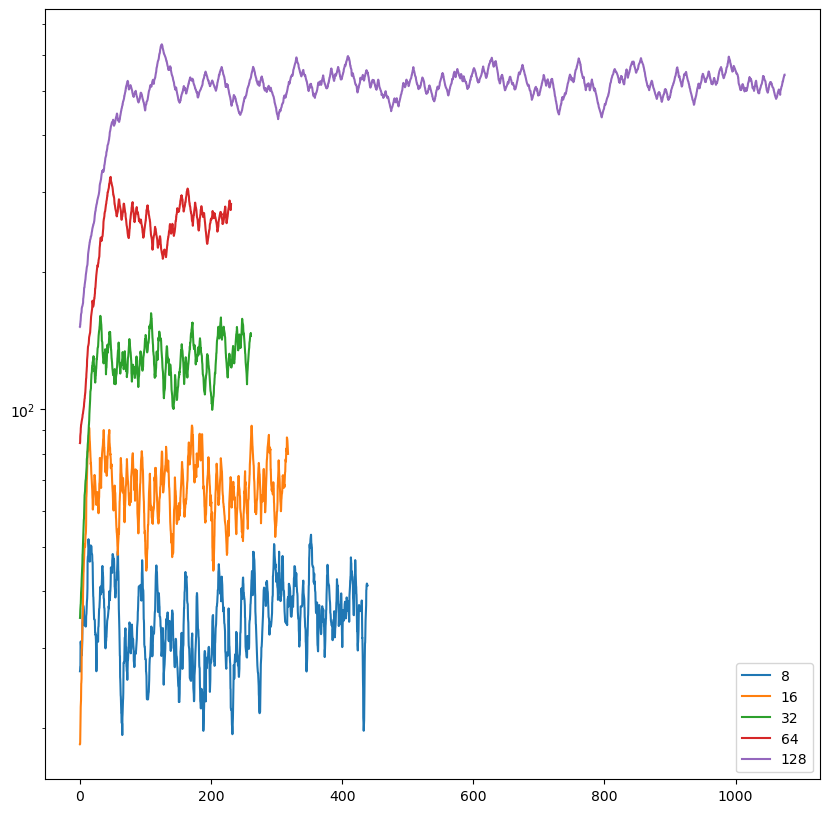

In [186]:
ecmc_ff_8_df = pd.read_csv("./ecmc_ff_sf_var_10m-8.csv")
ecmc_ff_8_events = np.array(ecmc_ff_8_df["events"].to_list())
ecmc_ff_8_mix = np.array(ecmc_ff_8_df["var_mix"].to_list())

ecmc_ff_8_long = []
for i in range(1, 4):
    ff_8_df = pd.read_csv("./ecmc_ff_sf_var_10m-8-" + str(i) + ".csv")
    ecmc_ff_8_long.append(ff_8_df["var_mix"].to_list())
ecmc_ff_8_long = np.array(ecmc_ff_8_long)

ecmc_ff_16_df = pd.read_csv("./ecmc_ff_sf_var_10m-16s-1.csv")
ecmc_ff_16_events = np.array(ecmc_ff_16_df["events"].to_list())
ecmc_ff_16_mix = np.array(ecmc_ff_16_df["var_mix"].to_list())

ecmc_ff_32_df = pd.read_csv("./ecmc_ff_sf_var_10m-32s-1.csv")
ecmc_ff_32_events = np.array(ecmc_ff_32_df["events"].to_list())
ecmc_ff_32_mix = np.array(ecmc_ff_32_df["var_mix"].to_list())

ecmc_ff_64_df = pd.read_csv("./ecmc_ff_sf_var_10m-64-1.csv")
ecmc_ff_64_events = np.array(ecmc_ff_64_df["events"].to_list())
ecmc_ff_64_mix = np.array(ecmc_ff_64_df["var_mix"].to_list())

ecmc_ff_128_df = pd.read_csv("./ecmc_ff_sf_var_10m-128-1.csv")
ecmc_ff_128_events = np.array(ecmc_ff_128_df["events"].to_list())
ecmc_ff_128_mix = np.array(ecmc_ff_128_df["var_mix"].to_list())

ecmc_ff_256_df = pd.read_csv("./ecmc_ff_sf_var_10m-256-1.csv")
ecmc_ff_256_events = np.array(ecmc_ff_256_df["events"].to_list())
ecmc_ff_256_mix = np.array(ecmc_ff_256_df["var_mix"].to_list())

ecmc_ff_512_df = pd.read_csv("./ecmc_ff_sf_var_10m-512-1.csv")
ecmc_ff_512_events = np.array(ecmc_ff_512_df["events"].to_list())
ecmc_ff_512_mix = np.array(ecmc_ff_512_df["var_mix"].to_list())

# x_64 = np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_64_events)/64
#x_256 = np.linspace(0, np.sum(ecmc_ff_256_events), np.sum(ecmc_ff_256_events))/256
x_512 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(ecmc_ff_512_events)/512
x_256 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(ecmc_ff_256_events)/256
x_128 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(ecmc_ff_128_events)/128
x_64 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(ecmc_ff_64_events)/64
x_32 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(ecmc_ff_32_events)/32
x_16 = np.linspace(0, len(ecmc_ff_16_mix), len(ecmc_ff_16_mix))*np.mean(ecmc_ff_16_events)/16
x_8 = np.linspace(0, len(ecmc_ff_8_mix), len(ecmc_ff_8_mix))*np.mean(ecmc_ff_8_events)/8
print(np.mean(ecmc_ff_8_events)/8)
print(np.mean(ecmc_ff_16_events)/16)

fig, ax = plt.subplots(1, figsize=(10, 10))
# ax[0].plot(x_64[:20], ecmc_ff_64_mix[:20]/64)
# ax[1].plot(x_8, ecmc_ff_8_mix/8)

# EXACT equilibrium variance given by: N^2 * l_free^2/4
def calculate_var_equil(n_particles):

    diameter = 400/(2*n_particles)
    L_free = (400 - n_particles * diameter)

    return  (n_particles**2*(L_free/n_particles)**2)/(4 * (n_particles+1))
var_equil_8 = calculate_var_equil(8)
var_equil_16 = calculate_var_equil(16)
var_equil_32 = calculate_var_equil(32)
var_equil_64 = calculate_var_equil(64)
var_equil_128 = calculate_var_equil(128)
var_equil_256 = calculate_var_equil(256)
var_equil_512 = calculate_var_equil(512)
var_equil_1024 = calculate_var_equil(1024)
var_equil_2048 = calculate_var_equil(2048)

print(var_equil_8, var_equil_16)
print(np.mean(ecmc_ff_8_mix), np.mean(ecmc_ff_16_mix))

ax.plot(x_8[:2000], (ecmc_ff_8_mix[:2000]/var_equil_8), label="8")
#ax.plot(x_8[:2000], 1/(np.mean(ecmc_ff_8_long, axis=0)[:2000]/var_equil_8), label="8")
#ax.plot(x_8[:3000], ecmc_ff_8d_mix[:3000]/var_equil_8, label="8 s")
ax.plot(x_16[:2000], ((ecmc_ff_16_mix)[:2000]/var_equil_16), label="16")
ax.plot(x_32[:2000], ((ecmc_ff_32_mix)[:2000]/var_equil_32), label="32")
ax.plot(x_64[:2000], (ecmc_ff_64_mix[:2000]/var_equil_64), label="64")
ax.plot(x_128[:10000], (ecmc_ff_128_mix[:10000]/var_equil_128), label="128")
# ax.plot(x_256[:5000], (ecmc_ff_256_mix[:5000]/var_equil_256), label="256")
# ax.plot(x_512[:10000], (ecmc_ff_512_mix[:10000]/var_equil_512), label="512")

#plt.hlines(var_equil_8, 0, 100)
# ax[0][1].plot(x_8[:20], ecmc_ff_8d_mix[:20]/var_equil_8)
# ax[1][1].plot(x_64[:100], ecmc_ff_64d_mix[:100])
# plt.plot(np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_64_events)/64, ecmc_ff_64_mix/64)
# plt.plot(np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_8_events)/8, ecmc_ff_8_mix/8)

ax.legend()
ax.set_yscale('log')
#ax.set_xscale('log')

#### MEANIFIED system sizes 

In [193]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_8 = []
eff_8_events = []
for i in range(1, 100 + 1):
    e8_df = pd.read_csv("../data/8/ecmc_ff_sf_10m-8-" + str(i) + ".csv")
    eff_8.append(e8_df["var_mix"].to_list())
    eff_8_events.append(np.mean(e8_df["events"].to_list()))
eff_8 = np.array(eff_8).mean(axis=0)
eff_8_events = np.mean(eff_8_events)

eff_16 = []
eff_16_events = []
for i in range(1, 100 + 1):
    e16_df = pd.read_csv("../data/16/ecmc_ff_sf_10m-16-" + str(i) + ".csv")
    eff_16.append(e16_df["var_mix"].to_list())
    eff_16_events.append(np.mean(e16_df["events"].to_list()))
eff_16 = np.array(eff_16).mean(axis=0)
eff_16_events = np.mean(eff_16_events)

eff_32 = []
eff_32_events = []
for i in range(1, 100 + 1):
    e32_df = pd.read_csv("../data/32/ecmc_ff_sf_10m-32-" + str(i) + ".csv")
    eff_32.append(e32_df["var_mix"].to_list())
    eff_32_events.append(np.mean(e32_df["events"].to_list()))
eff_32 = np.array(eff_32).mean(axis=0)
eff_32_events = np.mean(eff_32_events)

eff_64 = []
eff_64_events = []
for i in range(1, 100 + 1):
    e64_df = pd.read_csv("../data/64/ecmc_ff_sf_10m-64-" + str(i) + ".csv")
    eff_64.append(e64_df["var_mix"].to_list())
    eff_64_events.append(np.mean(e64_df["events"].to_list()))
eff_64 = np.array(eff_64).mean(axis=0)
eff_64_events = np.mean(eff_64_events)

eff_128 = []
eff_128_events = []
for i in range(1, 100 + 1):
    e128_df = pd.read_csv("../data/128/ecmc_ff_sf_10m-128-" + str(i) + ".csv")
    eff_128.append(e128_df["var_mix"].to_list())
    eff_128_events.append(np.mean(e128_df["events"].to_list()))
eff_128 = np.array(eff_128).mean(axis=0)
eff_128_events = np.mean(eff_128_events)

eff_256 = []
eff_256_events = []
for i in range(1, 100 + 1):
    e256_df = pd.read_csv("../data/256/ecmc_ff_sf_10m-256-" + str(i) + ".csv")
    eff_256.append(e256_df["var_mix"].to_list())
    eff_256_events.append(np.mean(e256_df["events"].to_list()))
eff_256 = np.array(eff_256).mean(axis=0)
eff_256_events = np.mean(eff_256_events)

eff_512 = []
eff_512_events = []
for i in range(1, 100 + 1):
    e512_df = pd.read_csv("../data/512/ecmc_ff_sf_10m-512-" + str(i) + ".csv")
    eff_512.append(e512_df["var_mix"].to_list())
    eff_512_events.append(np.mean(e512_df["events"].to_list()))
eff_512 = np.array(eff_512).mean(axis=0)
eff_512_events = np.mean(eff_512_events)

eff_1024 = []
eff_1024_events = []
for i in range(1, 100 + 1):
    e1024_df = pd.read_csv("../data/1024/ecmc_ff_sf_10m-1024-" + str(i) + ".csv")
    eff_1024.append(e1024_df["var_mix"].to_list())
    eff_1024_events.append(np.mean(e1024_df["events"].to_list()))
eff_1024 = np.array(eff_1024).mean(axis=0)
eff_1024_events = np.mean(eff_1024_events)

eff_2048 = []
eff_2048_events = []
for i in range(1, 100 + 1):
    e2048_df = pd.read_csv("../data/2048/ecmc_ff_sf_10m-2048-" + str(i) + ".csv")
    eff_2048.append(e2048_df["var_mix"].to_list())
    eff_2048_events.append(np.mean(e2048_df["events"].to_list()))
eff_2048 = np.array(eff_2048).mean(axis=0)
eff_2048_events = np.mean(eff_2048_events)

x_2048 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_2048_events)/2048
x_1024 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_1024_events)/1024
x_512 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_512_events)/512
x_256 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_256_events)/256
x_128 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_128_events)/128
x_64 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_64_events)/64
x_32 = np.linspace(0, len(ecmc_ff_32_mix), len(ecmc_ff_32_mix))*np.mean(eff_32_events)/32
x_16 = np.linspace(0, len(ecmc_ff_16_mix), len(ecmc_ff_16_mix))*np.mean(eff_16_events)/16
x_8 = np.linspace(0, len(ecmc_ff_8_mix), len(ecmc_ff_8_mix))*np.mean(eff_8_events)/8


def calculate_var_equil(n_particles):

    diameter = 400/(2*n_particles)
    L_free = (400 - n_particles * diameter)

    return  (n_particles**2*(L_free/n_particles)**2)/(4 * (n_particles+1))
var_equil_8 = calculate_var_equil(8)
var_equil_16 = calculate_var_equil(16)
var_equil_32 = calculate_var_equil(32)
var_equil_64 = calculate_var_equil(64)
var_equil_128 = calculate_var_equil(128)
var_equil_256 = calculate_var_equil(256)
var_equil_512 = calculate_var_equil(512)
var_equil_1024 = calculate_var_equil(1024)
var_equil_2048 = calculate_var_equil(2048)


(0.0, 2.0)

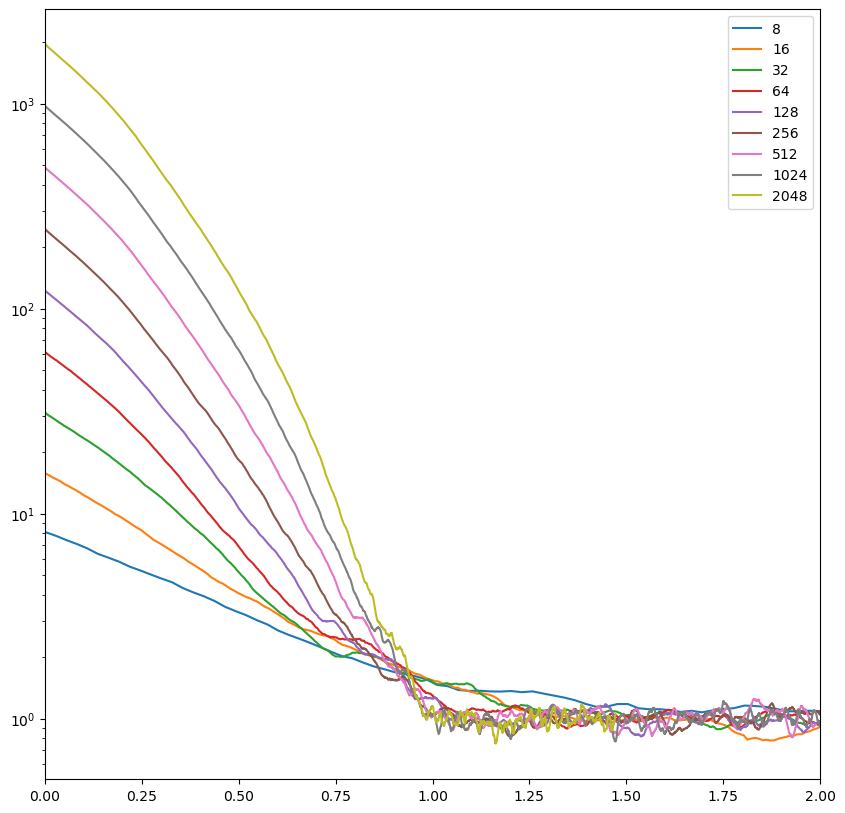

In [194]:
fig, ax = plt.subplots(1, figsize=(10, 10))

ax.plot(x_8[:1000]/8, (eff_8[:1000]/var_equil_8), label="8")
ax.plot(x_16[:2000]/16, ((eff_16)[:2000]/var_equil_16), label="16")
ax.plot(x_32[:2000]/32, ((eff_32)[:2000]/var_equil_32), label="32")
ax.plot(x_64[:2000]/64, (eff_64[:2000]/var_equil_64), label="64")
ax.plot(x_128[:10000]/128, (eff_128[:10000]/var_equil_128), label="128")
ax.plot(x_256[:5000]/256, (eff_256[:5000]/var_equil_256), label="256")
ax.plot(x_512[:10000]/512, (eff_512[:10000]/var_equil_512), label="512")
ax.plot(x_1024[:30000]/1024, (eff_1024[:30000]/var_equil_1024), label="1024")
ax.plot(x_2048[:30000]/2048, (eff_2048[:30000]/var_equil_2048), label="2048")

ax.legend()
ax.set_yscale('log')
ax.set_xlim(0, 2)


[200.0, 0.0, 0.0, 0.0, 200.0, 200.0, 200.0, 200.0] 9375.0 125.0


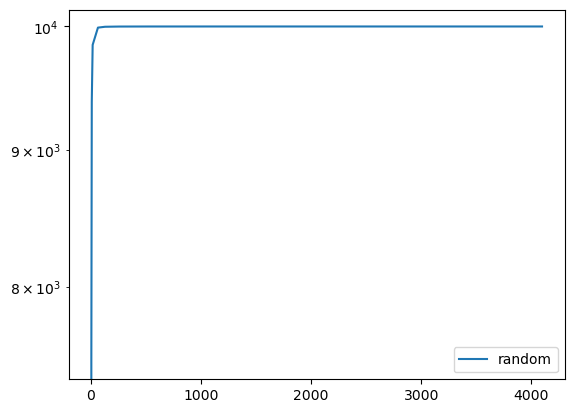

In [3]:
def sum_u(n_particles, t = "rand"):
    length = 400
    diameter = length/(2*n_particles)
    x_pos = [diameter/2 + (i-1)*diameter for i in range(1, n_particles + 1)]
    # 
    # x_prime = [x_0 if x_0 >= x_pos[0] else x_0 + length for x_0 in x_pos]
    x_uniform = [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]
    #print("uniform", x_pos)
    u = []

    def delta_i(i):
        #print("particle pairs ", (i-1)%n_particles, (i-2)%n_particles)
        a_i =  0
        a_j = 0

        # if i - 1  > n_particles:
        #     #print(i)
        #     a_i = length
        # if i - 2 < 0:
        #     a_j = -length
        # if i - 2  > n_particles:
        #     a_j = length

        a = x_pos[(i-1)%n_particles] + a_i - (x_pos[(i-2)%n_particles] + a_j) - diameter
        b = x_uniform[(i-1)%n_particles] + a_i - (x_uniform[(i-2)%n_particles] + a_j) - diameter

        # a = x_pos[int((i+n_particles/2))%n_particles] + a_i - (x_pos[(i-1)%n_particles] + a_j) - ((n_particles + 1) * diameter)
        # b = x_uniform[int(((i+n_particles/2)))%n_particles] + a_i - (x_uniform[(i-1)%n_particles] + a_j) - ((n_particles + 1) * diameter)
        # if i-1 < 0:
        #     a -= length
        # if i-1 > n_particles:
        #     a += length
        # if i > n_particles:
        #     a+= length
        #print("delta calc", a, x_pos[(i-1)%n_particles] + a_i, - (x_pos[(i-2)%n_particles] + a_j), -diameter)

        if t == "rand":
            return np.abs(a)
        elif t == "uni":
            return b
    
    for j in range(1, n_particles + 1):
        u_i = 0
        for i in range(0, int(n_particles/2) + 1):
            #print("idx", j, i)
            u_i += delta_i(i+j)
            #print(i)
        u.append(u_i)
    return u

p_size = [2, 4, 8, 16, 64, 128, 256, 512, 1024, 2048, 4096]
s4 = sum_u(8)
print(s4, np.var(s4), np.mean(s4))
# p_size = [4]
plt.plot(p_size, np.array([np.var(sum_u(i, t="rand")) for i in p_size]), label="random")
# # plt.plot(p_size, np.array([np.var(sum_u(i, t="uni")) for i in p_size]), label="uni")
#plt.plot(p_size, (np.array(p_size)*128)**2, label="scale")
plt.yscale("log")
#plt.xscale("log")
plt.legend()

[9.375, 21.875, 34.375, 46.875, 59.375, 71.875, 84.375, 96.875, 109.375, 121.875, 134.375, 146.875, 159.375, 171.875, 184.375, 196.875, 209.375, 221.875, 234.375, 246.875, 259.375, 271.875, 284.375, 296.875, 309.375, 321.875, 334.375, 346.875, 359.375, 371.875, 384.375, 396.875]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0, -300.0]
40000.0 -100.0
[150.0, 350.0]
[75.0, 175.0, 275.0, 375.0]
[37.5, 87.5, 137.5, 187.5, 237.5, 287.5, 337.5, 387.5]
[18.75, 43.75, 68.75, 93.75, 118.75, 143.75, 168.75, 193.75, 218.75, 243.75, 268.75, 293.75, 318.75, 343.75, 368.75, 393.75]
[4.6875, 10.9375, 17.1875, 23.4375, 29.6875, 35.9375, 42.1875, 48.4375, 54.6875, 60.9375, 67.1875, 73.4375, 79.6875, 85.9375, 92.1875, 98.4375, 104.6875, 110.9375, 117.1875, 123.4375, 129.6875, 135.9375, 142.1875, 148.4375, 154.6875, 160.937

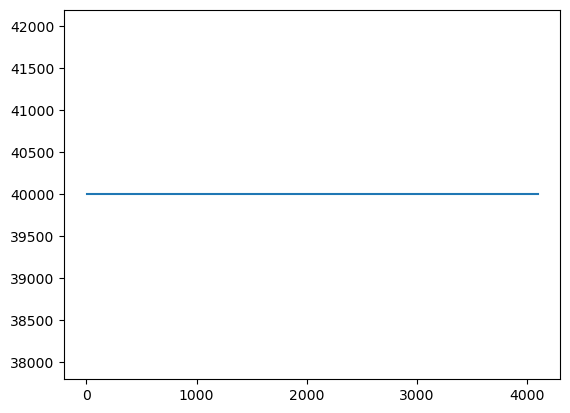

In [145]:
def sum_w(n_particles):
    length = 400
    diameter = length/(2*n_particles)

    # compact dist
    #x_compact = np.array([diameter/2 + i*diameter for i in range(0, n_particles)])

    #uniform dist
    x_compact= [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]

    print(x_compact)

    w = []
    # go through particles 1,...,N
    # go through sum k=0^N/2
    for i in range(1, n_particles+1):
        w_i = 0
        # for j in range(0, int(n_particles/2) + 1):
        # #     #print((i+j-1)%n_particles,(i+j-2)%n_particles, i, i+j)
        # #     #print(x_compact[(i+j - 1)%n_particles], x_compact[(i+j - 2)%n_particles])
        #     d_i = (x_compact[(i+j - 1)%n_particles] - x_compact[(i+j - 2)%n_particles]) - diameter
        # #     if d_i >= 0:
        # #         w_i += d_i
        #     w_i += d_i
        # w.append(w_i)

        for j in range(i + int(n_particles/2), i, -1):
            #print(i, j)
            #print(x_compact[(j-1)%n_particles] - x_compact[(j-2)%n_particles] - diameter)
            w_i += x_compact[(j-1)%n_particles] - x_compact[(j-2)%n_particles] - diameter
            
        #print("final wi ", w_i)
        w.append(w_i)
    
    return w

w = sum_w(32)
print(w)
print(np.var(w), np.mean(w))
# print(np.var(w))
p_size = [2, 4, 8, 16, 64, 128, 256, 512, 1024, 2048, 4096]
# arr = np.array([np.var(sum_w(i)) for i in p_size])
# s4 = sum_w(4)
# # p_size = [4]
plt.plot(p_size, np.array([np.var(sum_w(i)) for i in p_size]), label="random")
# # plt.plot(p_size, np.array([np.var(sum_u(i, t="uni")) for i in p_size]), label="uni")
# plt.plot(p_size, (np.array(p_size)*128)**2, label="scale")
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()

In [129]:
def sum_w2(n_particles):
    length = 400
    diameter = length/(2*n_particles)

    # compact dist
    #x_compact = np.array([diameter/2 + i*diameter for i in range(0, n_particles)])

    #uniform dist
    x_compact= [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]

    print(x_compact)

    w = []
    # go through particles 1,...,N
    # go through sum k=0^N/2
    for i in range(1, n_particles+1):
        w_i = 0
        for j in range(0, i + n_particles//2 + 1):
            w_i += x_compact[(j-1)%n_particles] - x_compact[(j-2)%n_particles] - diameter
            
        #print("final wi ", w_i)
        w.append(w_i)
    
    return w

# VAR COMPACT = N^2 * lfree^2 / 4
def var_compact(n_particles):
    return (n_particles**2 * 200**2)/4
n_particles = 64
w8 = sum_w2(n_particles)
print(np.var(w8), var_compact(n_particles))




[4.6875, 10.9375, 17.1875, 23.4375, 29.6875, 35.9375, 42.1875, 48.4375, 54.6875, 60.9375, 67.1875, 73.4375, 79.6875, 85.9375, 92.1875, 98.4375, 104.6875, 110.9375, 117.1875, 123.4375, 129.6875, 135.9375, 142.1875, 148.4375, 154.6875, 160.9375, 167.1875, 173.4375, 179.6875, 185.9375, 192.1875, 198.4375, 204.6875, 210.9375, 217.1875, 223.4375, 229.6875, 235.9375, 242.1875, 248.4375, 254.6875, 260.9375, 267.1875, 273.4375, 279.6875, 285.9375, 292.1875, 298.4375, 304.6875, 310.9375, 317.1875, 323.4375, 329.6875, 335.9375, 342.1875, 348.4375, 354.6875, 360.9375, 367.1875, 373.4375, 379.6875, 385.9375, 392.1875, 398.4375]
23332.51953125 40960000.0


In [161]:
def sum_w3(n_particles):
    length = 400
    diameter = length/(2*n_particles)

    # compact dist
    #x_compact = np.array([diameter/2 + i*diameter for i in range(0, n_particles)])

    #uniform dist
    x_compact= [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]

    #print(x_compact)

    w = []
    # go through particles 1,...,N
    # go through sum k=0^N/2
    print(n_particles//2)
    
    #distance = np.abs((self.particle_list[i].pos[0] - self.particle_list[i + int(len(self.particle_list)/2)].pos[0] + self.rect_value/2)%self.rect_value - self.rect_value/2)

    for i in range(0, n_particles):
        w_i = 0
        
    #w_i += x_compact[(i+j)%n_particles] - x_compact[(i+j - 1)%n_particles] - diameter
        w_i = x_compact[(i+n_particles//2)%n_particles] - x_compact[(i)%n_particles] - n_particles//2 * diameter 
        if w_i < 0:
            w_i += length
            
        
        #print(count)
        #print("final wi ", w_i)
        w.append(w_i)
    
    return w

# VAR COMPACT = N^2 * lfree^2 / 4
def var_compact(n_particles):
    return (n_particles**2 * (200/n_particles)**2)/4

def var_equilibrium(n_particles):
    return ((200)**2)/(4*(n_particles+1))

n_particles = 8
w8 = sum_w3(n_particles)
print(w8)
print(np.var(w8), var_compact(n_particles), var_equilibrium(n_particles))



4
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
0.0 10000.0 1111.111111111111
